### CS5691 Assignment 2 - Question 2

##### Submitted by: Vennapareddy Abhigna, Roll Number: ME19B059

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import random

In [2]:
df=pd.read_csv('A2Q2Data_train.csv',header=None)
shape=df.shape
n=shape[0] #number of data points (rows)
f=shape[1]-1 #number of features (columns)

columns = ['x1']
for i in range(f-1):
    columns.append('x'+str(i+2)) #x1 to x100 are features
columns.append('y')
df.columns = columns
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,y
0,0.58351,0.379390,0.839750,0.086861,0.611920,0.39203,0.189640,0.585090,0.89494,0.393850,...,0.51706,0.20535,0.829990,0.24995,0.319800,0.19674,0.958550,0.849480,0.923690,1.9741
1,0.86622,0.451350,0.934790,0.235810,0.504880,0.49742,0.117220,0.574880,0.71051,0.336890,...,0.27412,0.46065,0.655440,0.56656,0.490620,0.19920,0.320680,0.414190,0.830230,2.3354
2,0.39142,0.919950,0.138730,0.991810,0.543670,0.98449,0.340260,0.206470,0.40131,0.128990,...,0.27247,0.38911,0.799490,0.57753,0.866820,0.69741,0.628630,0.294790,0.542800,2.2053
3,0.79553,0.278540,0.228900,0.789290,0.492220,0.67084,0.769410,0.057104,0.20393,0.086936,...,0.24901,0.65976,0.943350,0.41246,0.927150,0.11015,0.101310,0.668010,0.345730,2.0400
4,0.65223,0.966650,0.179850,0.354060,0.840420,0.92891,0.014597,0.229530,0.43920,0.548940,...,0.93277,0.23674,0.027077,0.27111,0.233660,0.56356,0.047289,0.627920,0.979300,2.2053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.13627,0.056966,0.229530,0.343080,0.019914,0.29071,0.124340,0.523650,0.80031,0.120490,...,0.23140,0.75825,0.418120,0.33551,0.361130,0.12088,0.050074,0.335240,0.040619,3.0543
9996,0.95662,0.141930,0.978510,0.782700,0.198780,0.29844,0.331600,0.302100,0.68403,0.827360,...,0.47084,0.71044,0.323540,0.65593,0.043369,0.69314,0.672490,0.573740,0.110510,2.3255
9997,0.89209,0.997530,0.880430,0.813160,0.294460,0.40088,0.198950,0.402530,0.98442,0.746290,...,0.64760,0.86836,0.227950,0.92668,0.735700,0.77533,0.827720,0.331150,0.928750,2.0964
9998,0.70381,0.422940,0.259230,0.230480,0.710920,0.27516,0.843470,0.338950,0.22252,0.586820,...,0.76356,0.00795,0.569030,0.93311,0.501910,0.36688,0.822460,0.498100,0.060471,1.8405


#### 1.i - Obtain the least squares solution w_ML to the regression problem using the analytical solution

In [3]:
XT = np.asmatrix(df.drop(["y"],axis=1))
XT

matrix([[0.58351 , 0.37939 , 0.83975 , ..., 0.95855 , 0.84948 , 0.92369 ],
        [0.86622 , 0.45135 , 0.93479 , ..., 0.32068 , 0.41419 , 0.83023 ],
        [0.39142 , 0.91995 , 0.13873 , ..., 0.62863 , 0.29479 , 0.5428  ],
        ...,
        [0.89209 , 0.99753 , 0.88043 , ..., 0.82772 , 0.33115 , 0.92875 ],
        [0.70381 , 0.42294 , 0.25923 , ..., 0.82246 , 0.4981  , 0.060471],
        [0.36578 , 0.028173, 0.021793, ..., 0.87269 , 0.015329, 0.99026 ]])

In [4]:
X = XT.T
X

matrix([[0.58351 , 0.86622 , 0.39142 , ..., 0.89209 , 0.70381 , 0.36578 ],
        [0.37939 , 0.45135 , 0.91995 , ..., 0.99753 , 0.42294 , 0.028173],
        [0.83975 , 0.93479 , 0.13873 , ..., 0.88043 , 0.25923 , 0.021793],
        ...,
        [0.95855 , 0.32068 , 0.62863 , ..., 0.82772 , 0.82246 , 0.87269 ],
        [0.84948 , 0.41419 , 0.29479 , ..., 0.33115 , 0.4981  , 0.015329],
        [0.92369 , 0.83023 , 0.5428  , ..., 0.92875 , 0.060471, 0.99026 ]])

In [5]:
Y = np.asmatrix(df['y']).T
Y

matrix([[1.9741],
        [2.3354],
        [2.2053],
        ...,
        [2.0964],
        [1.8405],
        [2.7624]])

In [6]:
XXT = X*XT
XXT

matrix([[3360.76759145, 2494.81620187, 2538.27646396, ..., 2547.05258557,
         2521.16968965, 2563.99199775],
        [2494.81620187, 3306.39307717, 2507.51217615, ..., 2490.91584082,
         2482.2403131 , 2534.7448421 ],
        [2538.27646396, 2507.51217615, 3371.33523953, ..., 2547.89640887,
         2526.29817797, 2543.64640375],
        ...,
        [2547.05258557, 2490.91584082, 2547.89640887, ..., 3386.93433835,
         2528.20800882, 2580.24365487],
        [2521.16968965, 2482.2403131 , 2526.29817797, ..., 2528.20800882,
         3351.05674894, 2528.53996979],
        [2563.99199775, 2534.7448421 , 2543.64640375, ..., 2580.24365487,
         2528.53996979, 3398.49937121]])

In [7]:
XY = X*Y
XY

matrix([[11151.93643777],
        [11001.41134808],
        [11141.16586975],
        [11100.74057623],
        [11140.1256598 ],
        [11148.25320707],
        [10895.17118273],
        [11178.74974755],
        [11014.69378435],
        [11478.05525022],
        [11098.69330671],
        [11070.03217898],
        [11088.05692608],
        [11025.09319017],
        [11105.68475287],
        [11061.48229528],
        [11096.77021334],
        [10906.39910478],
        [10968.14053971],
        [11184.06131223],
        [11101.16469098],
        [11065.29805321],
        [10981.88457711],
        [11033.1184978 ],
        [10979.91790569],
        [11030.43973501],
        [11114.5809587 ],
        [11111.95785374],
        [11091.94732568],
        [11041.80417104],
        [11070.92438101],
        [11174.32807139],
        [11126.7601205 ],
        [11191.54678566],
        [11012.87283789],
        [11130.05108634],
        [11032.38965472],
        [11039.401419  ],
        [110

In [8]:
XXT_inv = np.linalg.inv(XXT)
XXT_inv

matrix([[ 1.21625244e-03,  3.05755741e-06, -1.04197286e-05, ...,
         -9.58200053e-06, -8.95287275e-06, -2.99048796e-05],
        [ 3.05755741e-06,  1.19680453e-03, -1.40643569e-05, ...,
          2.51112383e-05,  8.43710856e-07, -3.72013729e-05],
        [-1.04197286e-05, -1.40643569e-05,  1.19944482e-03, ...,
         -1.07833432e-05, -1.50215347e-05,  1.07894075e-06],
        ...,
        [-9.58200053e-06,  2.51112383e-05, -1.07833432e-05, ...,
          1.20814256e-03, -4.68128507e-06, -3.94136080e-05],
        [-8.95287275e-06,  8.43710856e-07, -1.50215347e-05, ...,
         -4.68128507e-06,  1.18701615e-03, -1.87452662e-06],
        [-2.99048796e-05, -3.72013729e-05,  1.07894075e-06, ...,
         -3.94136080e-05, -1.87452662e-06,  1.19904986e-03]])

##### We obtain w_ML (least square solution) as pseudo_inv(X*XT) * XY which is analytically obtained by minimizing least square error which is (||XT*w_ML  -  Y||_2)^2

In [9]:
w_ML = XXT_inv * XY
w_ML

matrix([[-7.84961009e-03],
        [-1.36715320e-02],
        [-3.61656438e-03],
        [ 2.64909160e-03],
        [ 1.88551446e-01],
        [ 2.65314657e-03],
        [ 9.46531786e-03],
        [ 1.79809481e-01],
        [ 3.73757317e-03],
        [ 4.99608944e-01],
        [ 8.35836265e-03],
        [ 4.29108775e-03],
        [ 1.42141179e-02],
        [ 3.94232414e-03],
        [ 9.36795890e-03],
        [-1.12038274e-03],
        [ 3.35727500e-03],
        [ 1.16152212e-03],
        [-9.40884707e-03],
        [-2.45575476e-03],
        [-1.17409629e-02],
        [-1.01960612e-02],
        [ 7.95771321e-03],
        [-1.00574854e-02],
        [ 6.04882939e-03],
        [-4.67345192e-03],
        [-3.09091547e-03],
        [ 8.14909193e-03],
        [ 1.20264599e-02],
        [-6.82458163e-03],
        [-8.65405539e-03],
        [ 9.86273479e-04],
        [ 4.92968011e-03],
        [ 5.99772461e-03],
        [-1.34667860e-02],
        [ 1.07075729e-03],
        [ 1.32745992e-02],
 

In [10]:
least_square_error_ML = ((XT*w_ML - Y).T * (XT*w_ML - Y))[0,0]
least_square_error_ML

396.8644186272516

#### 1.ii - Code the gradient descent algorithm with suitable step size to solve the least squares algorithms and plot ||wt − wML||_2 as a function of t. What do you observe?

In [11]:
t=1
dis = []
e = 10**(-20)
w_t = np.asmatrix(np.zeros(f)).T
#w_t = w_ML
step = 1/1000000*t
dis.append(math.sqrt((w_t-w_ML).T * (w_t-w_ML)))
d1=math.sqrt((XT*w_t - Y).T * (XT*w_t - Y))
#print(math.sqrt((XT*w_t - Y).T * (XT*w_t - Y)))
w_t1 = w_t - step*(2 * (X*XT) * w_t  -  2*X*Y)
dis.append(math.sqrt((w_t1-w_ML).T * (w_t1-w_ML)))
d2=math.sqrt((XT*w_t1 - Y).T * (XT*w_t1 - Y))
#print(math.sqrt((XT*w_t1 - Y).T * (XT*w_t1 - Y)))
#while (math.sqrt((XT*w_t1 - Y).T * (XT*w_t1 - Y)) > e):
while (d1-d2>e):
    t=t+1
    step = 1/1000000*t
    w_t = w_t1
    w_t1 = w_t - step*(2 * (X*XT) * w_t  -  2*X*Y)
    dis.append(math.sqrt((w_t1-w_ML).T * (w_t1-w_ML)))
    d1 = d2
    d2 = math.sqrt((XT*w_t1 - Y).T * (XT*w_t1 - Y))
    #print(math.sqrt((XT*w_t1 - Y).T * (XT*w_t1 - Y)))

In [12]:
t

9

Text(0, 0.5, '||w_t - w_ML||_2')

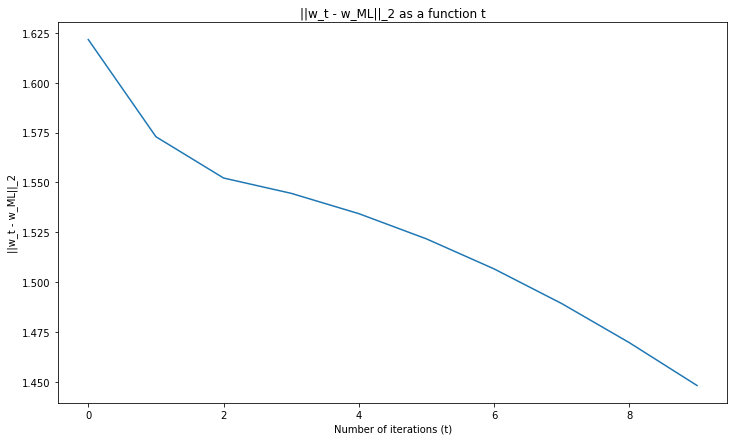

In [13]:
f1 = plt.figure()
f1.set_figwidth(12)
f1.set_figheight(7)
it = [j for j in range(t+1)]
plt.plot(it, dis)
plt.title('||w_t - w_ML||_2 as a function t')
plt.xlabel('Number of iterations (t)')
plt.ylabel('||w_t - w_ML||_2')

In [14]:
least_square_error1 = ((XT*w_t - Y).T * (XT*w_t - Y))[0,0]
least_square_error1

2195.292263013331

Text(0.5, 1.0, '||w_t - w_ML||_2 as a function t for stepsize in the order of 10^-9')

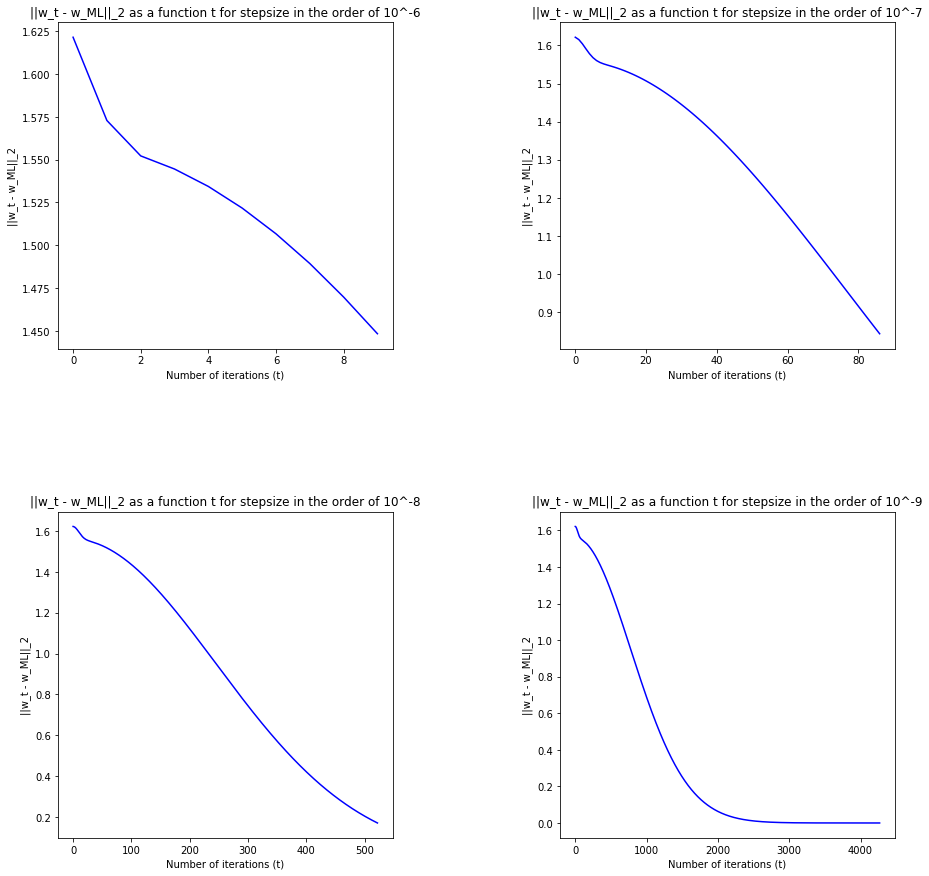

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
p = 0
least_square_error_wt = []
k = [10**6,10**7,10**8,10**9]
for o1 in range(2):
    for o2 in range(2):
        
        t=1
        dis = []
        e = 10**(-20)
        w_t = np.asmatrix(np.zeros(f)).T
        #w_t = w_ML
        step = 1/k[p]*t
        dis.append(math.sqrt((w_t-w_ML).T * (w_t-w_ML)))
        d1=math.sqrt((XT*w_t - Y).T * (XT*w_t - Y))
        w_t1 = w_t - step*(2 * (X*XT) * w_t  -  2*X*Y)
        dis.append(math.sqrt((w_t1-w_ML).T * (w_t1-w_ML)))
        d2=math.sqrt((XT*w_t1 - Y).T * (XT*w_t1 - Y))
        while (d1-d2>e):
            t=t+1
            step = 1/k[p]*t
            w_t = w_t1
            w_t1 = w_t - step*(2 * (X*XT) * w_t  -  2*X*Y)
            dis.append(math.sqrt((w_t1-w_ML).T * (w_t1-w_ML)))
            d1 = d2
            d2 = math.sqrt((XT*w_t1 - Y).T * (XT*w_t1 - Y))
        
        it = [j for j in range(t+1)]
        sns.lineplot(it, dis,color='blue',ax=axes[o1][o2])
        axes[o1][o2].set_xlabel('Number of iterations (t)')
        axes[o1][o2].set_ylabel('||w_t - w_ML||_2')
        least_square_error_wt.append(((XT*w_t - Y).T * (XT*w_t - Y))[0,0])
        p=p+1
        
axes[0][0].set_title('||w_t - w_ML||_2 as a function t for stepsize in the order of 10^-6')
axes[0][1].set_title('||w_t - w_ML||_2 as a function t for stepsize in the order of 10^-7')
axes[1][0].set_title('||w_t - w_ML||_2 as a function t for stepsize in the order of 10^-8')
axes[1][1].set_title('||w_t - w_ML||_2 as a function t for stepsize in the order of 10^-9')

In [16]:
least_square_error_wt

[2195.292263013331, 994.5344916146937, 420.8321967376389, 396.86441862958867]

#### 1.iii - Code the stochastic gradient descent algorithm using batch size of 100 and plot ||wt − wML||_2 as a function of t. What are your observations?

In [17]:
t = 1
e=10**(-20)
sum=0
w_t = np.asmatrix(np.zeros(f)).T
dis_sgd = []
sgdis = []
dis_sgd.append(math.sqrt((w_t-w_ML).T * (w_t-w_ML)))
sgdis.append(math.sqrt((w_t-w_ML).T * (w_t-w_ML)))
d1=math.sqrt((XT*w_t - Y).T * (XT*w_t - Y))
print(d1)

df1 = df.sample(n=100)
xt = np.asmatrix(df1.drop(["y"],axis=1))
y = np.asmatrix(df1['y']).T
step = 1/100000000*t
w_t1 = w_t - step*(2 * (xt.T*xt) * w_t  -  2*xt.T*y)
sum=sum+w_t1
w_s = sum/t
d2=math.sqrt((XT*w_s - Y).T * (XT*w_s - Y))
print(d2)
dis_sgd.append(math.sqrt((w_t1-w_ML).T * (w_t1-w_ML)))
sgdis.append(math.sqrt((w_s-w_ML).T * (w_s-w_ML)))

while (d1-d2 > e):
    t=t+1
    df1 = df.sample(n=100)
    xt = np.asmatrix(df1.drop(["y"],axis=1))
    y = np.asmatrix(df1['y']).T
    
    step = 1/100000000*t
    w_t = w_t1
    w_t1 = w_t - step*(2 * (xt.T*xt) * w_t  -  2*xt.T*y)
    d1 = d2
    sum=sum+w_t1
    w_s = sum/t
    d2=math.sqrt((XT*w_s - Y).T * (XT*w_s - Y))
    print(d2)
    dis_sgd.append(math.sqrt((w_t1-w_ML).T * (w_t1-w_ML)))
    sgdis.append(math.sqrt((w_s-w_ML).T * (w_s-w_ML)))
w_sgd = (sum-w_t1)/(t-1)

227.14788667081055
227.13736358972918
227.12668814816274
227.11249665642669
227.09434549721
227.0729956065824
227.04815216287608
227.01918620485446
226.98699483257334
226.95115966185327
226.9119946945886
226.86882042616736
226.82221253423444
226.77184869653428
226.71713072324258
226.65888114934023
226.59685317303544
226.53173325992776
226.4624441484982
226.389327361533
226.31282300545877
226.23275692402578
226.1493457373645
226.06233314106734
225.9718517678785
225.8778486476395
225.7800943324748
225.6788146213401
225.57411330697997
225.46587071261573
225.35397899992216
225.23917686058093
225.1210042763156
224.99970545280956
224.87466432446368
224.7456481659042
224.61404083343987
224.47901668387465
224.34066799955687
224.19893376364217
224.05353030332392
223.90460444421635
223.75257205556423
223.59653140521408
223.43750009029947
223.2751013064885
223.1094712892256
222.94072655117102
222.76876063393289
222.59380834777488
222.4157064882635
222.23477032317263
222.05056522740463
221.8630133

Text(0, 0.5, '||w_t - w_ML||_2')

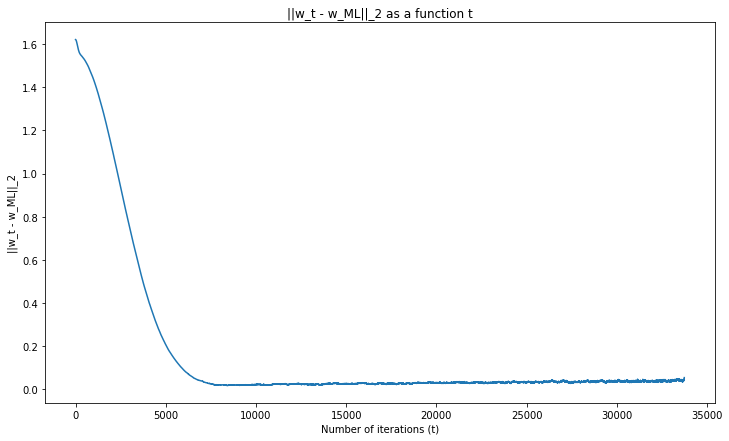

In [18]:
f1 = plt.figure()
f1.set_figwidth(12)
f1.set_figheight(7)
it = [j for j in range(t+1)]
plt.plot(it, dis_sgd)
plt.title('||w_t - w_ML||_2 as a function t')
plt.xlabel('Number of iterations (t)')
plt.ylabel('||w_t - w_ML||_2')

Text(0, 0.5, '||w_sgd - w_ML||_2')

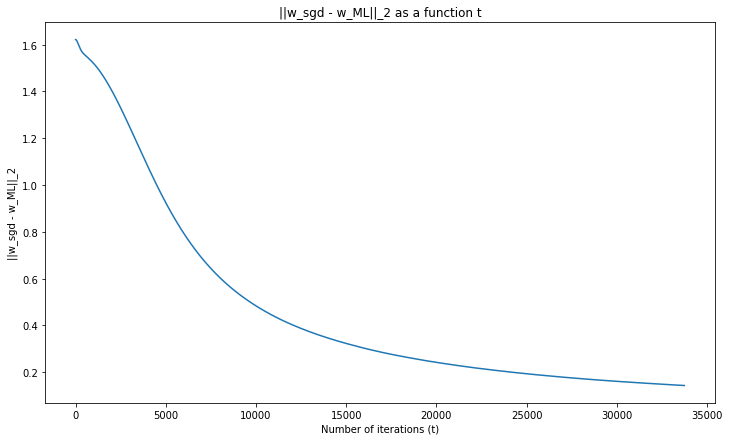

In [19]:
f1 = plt.figure()
f1.set_figwidth(12)
f1.set_figheight(7)
it = [j for j in range(t+1)]
plt.plot(it, sgdis)
plt.title('||w_sgd - w_ML||_2 as a function t')
plt.xlabel('Number of iterations (t)')
plt.ylabel('||w_sgd - w_ML||_2')

In [20]:
least_square_error_sgd = ((XT*w_sgd - Y).T * (XT*w_sgd - Y))[0,0]
least_square_error_sgd

414.95116694680587

#### 1.iv - Code the gradient descent algorithm for ridge regression. Cross-validate for various choices of λ and plot the error in the validation set as a function of λ. For the best λ chosen, obtain wR. Compare the test error (for the test data in the file A2Q2Data test.csv) of wR with wML. Which is better and why?

In [21]:
df2_train = df.iloc[:8000,:]
df2_test = df.iloc[8000:,:]
xt_train = np.asmatrix(df2_train.drop(["y"],axis=1))
y_train = np.asmatrix(df2_train['y']).T
xt_test = np.asmatrix(df2_test.drop(["y"],axis=1))
y_test = np.asmatrix(df2_test['y']).T

In [22]:
err = []
la = [l*0.0005 for l in range(0,100)]
#la = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
for lamb in la:
    t=1
    e = 10**(-20)
    w_t = np.asmatrix(np.zeros(f)).T
    step = 1/10000000*t
    d1=math.sqrt((xt_train*w_t - y_train).T * (xt_train*w_t - y_train)  +  lamb*(w_t.T*w_t))
    w_t1 = w_t - step*(2 * (xt_train.T*xt_train) * w_t  -  2*xt_train.T*y_train  +  2*lamb*w_t)
    d2=math.sqrt((xt_train*w_t1 - y_train).T * (xt_train*w_t1 - y_train)  +  lamb*(w_t1.T*w_t1))
    while (d1-d2>e):
        t=t+1
        step = 1/10000000*t
        w_t = w_t1
        w_t1 = w_t - step*(2 * (xt_train.T*xt_train) * w_t  -  2*xt_train.T*y_train  +  2*lamb*w_t)
        d1 = d2
        d2 = math.sqrt((xt_train*w_t1 - y_train).T * (xt_train*w_t1 - y_train)  +  lamb*(w_t1.T*w_t1))
    wR=w_t
    
    #error
    er=((xt_test*wR - y_test).T * (xt_test*wR - y_test))[0,0] + lamb*(wR.T*wR)[0,0]
    err.append(er)
    #print(er)

Text(0, 0.5, 'error on validation set')

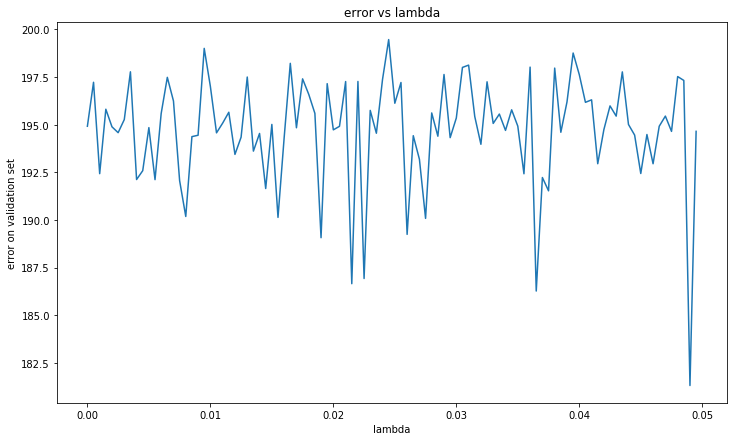

In [23]:
f1 = plt.figure()
f1.set_figwidth(12)
f1.set_figheight(7)
plt.plot(la, err)
plt.title('error vs lambda')
plt.xlabel('lambda')
plt.ylabel('error on validation set')

In [24]:
err=np.array(err)
o=np.where(err == err.min())[0][0]
lambd=la[o]
lambd

0.049

In [25]:
I = np.identity(f)
wR = np.linalg.inv(X*XT + lambd*I) * X*Y

In [26]:
df_test=pd.read_csv('A2Q2Data_test.csv',header=None)
shape_test=df_test.shape
n_test=shape_test[0] #number of data points (rows)
f_test=shape_test[1]-1 #number of features (columns)

columns_test = ['x1']
for i in range(f_test-1):
    columns_test.append('x'+str(i+2)) #x1 to x100 are features
columns_test.append('y')
df_test.columns = columns_test
df_test

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,y
0,0.21302,0.446210,0.51432,0.219750,0.495440,0.463670,0.26007,0.28137,0.983820,0.00777,...,0.92910,0.286690,0.45841,0.788740,0.041794,0.58736,0.904910,0.91718,0.68321,2.0121
1,0.32563,0.703990,0.31970,0.045240,0.869680,0.131360,0.47664,0.26632,0.334520,0.81200,...,0.51868,0.255460,0.29498,0.008869,0.169970,0.92325,0.421340,0.90906,0.61539,1.8164
2,0.49539,0.623570,0.58121,0.879160,0.930960,0.203040,0.35752,0.31232,0.066225,0.46389,...,0.85782,0.505300,0.32361,0.693090,0.690430,0.01604,0.467410,0.67303,0.60459,1.6435
3,0.88875,0.013187,0.87982,0.858160,0.793920,0.792390,0.76522,0.85145,0.233610,0.57924,...,0.25535,0.383410,0.55130,0.727730,0.676890,0.84605,0.611160,0.58514,0.41724,2.7451
4,0.15178,0.540760,0.26896,0.006752,0.101020,0.342080,0.86855,0.32698,0.285460,0.80503,...,0.54955,0.129320,0.94848,0.326100,0.268010,0.27125,0.535350,0.91872,0.16801,1.8932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.10578,0.870530,0.66376,0.570310,0.691110,0.065131,0.25840,0.56343,0.958840,0.75578,...,0.73314,0.947650,0.41785,0.450240,0.226930,0.12547,0.506790,0.60808,0.61612,2.2680
496,0.36756,0.673490,0.54089,0.932350,0.037031,0.806840,0.50789,0.27116,0.879440,0.57790,...,0.75535,0.067279,0.97832,0.759940,0.991350,0.80861,0.716250,0.43949,0.79699,2.8274
497,0.24582,0.320620,0.79933,0.743320,0.314150,0.713150,0.90045,0.67816,0.392680,0.96917,...,0.59358,0.711090,0.45839,0.434920,0.464740,0.69551,0.447860,0.78741,0.11548,2.8058
498,0.31768,0.937750,0.91269,0.840630,0.301710,0.600530,0.59427,0.10969,0.438170,0.39921,...,0.58933,0.892750,0.70348,0.715340,0.198450,0.31288,0.099705,0.82134,0.71902,2.2495


In [27]:
Xt_test = np.asmatrix(df_test.drop(["y"],axis=1))
Y_test = np.asmatrix(df_test['y']).T

In [28]:
e_wR=((Xt_test*wR - Y_test).T * (Xt_test*wR - Y_test))[0,0]
e_wR

185.3532650116639

In [29]:
e_ML=((Xt_test*w_ML - Y_test).T * (Xt_test*w_ML - Y_test))[0,0]
e_ML

185.36365558489712

In [30]:
e_ML>e_wR

True

In [31]:
mse_wR = e_wR/n_test
mse_wR

0.37070653002332776

In [32]:
mse_ML = e_ML/n_test
mse_ML

0.37072731116979424

In [33]:
mse_ML > mse_wR

True

In [34]:
e_train_ML = ((XT*w_ML - Y).T * (XT*w_ML - Y))[0,0]
e_train_ML

396.8644186272516

In [35]:
e_train_R = ((XT*wR - Y).T * (XT*wR - Y))[0,0]
e_train_R

396.8644257858158

In [36]:
e_train_R > e_train_ML

True